Data: a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


There are a lot of missing data.

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Extras

We have a feature .csv file. That describes the features information of the data.

In [6]:
feature_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')
feature_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [7]:
print(feature_info.loc['pub_rec']['Description'])

Number of derogatory public records


In [8]:
def feat_info(col_name):
    print(feature_info.loc[col_name]['Description'])

In [9]:
feat_info('dti')

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


## EDA

Let's check the balance between the values in target variable.

C:\Users\ssanj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

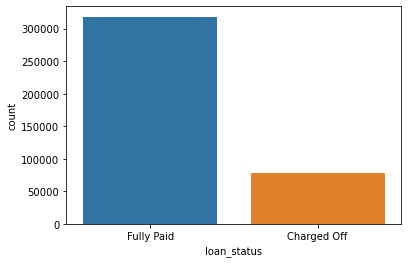

In [10]:
sns.countplot(df['loan_status'])

We have a imbalanced dataset.

C:\Users\ssanj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

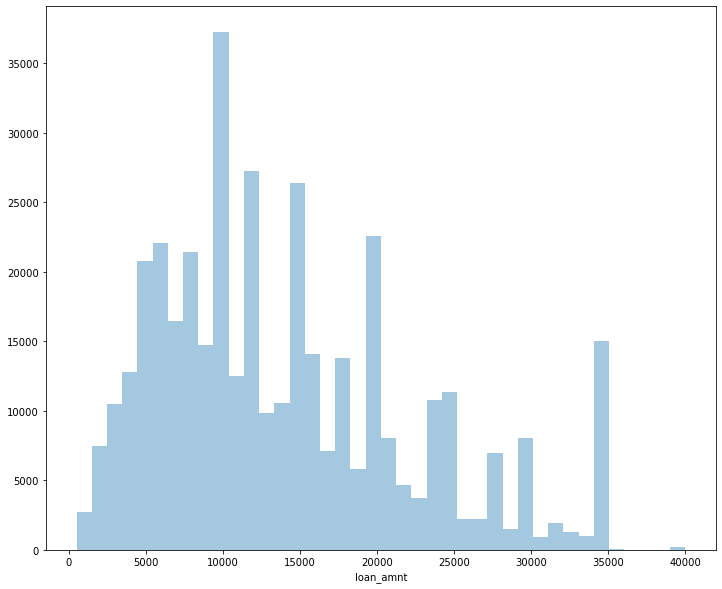

In [11]:
# Explose the loan amount.
plt.figure(figsize=(12,10))
sns.distplot(df['loan_amnt'], bins=40, kde=False)

Genrally the distribution is right skewed. We can see peaks at even loan amounts.

In [12]:
# It's good to check the correlation of features. This provides us much more information for EDA.
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

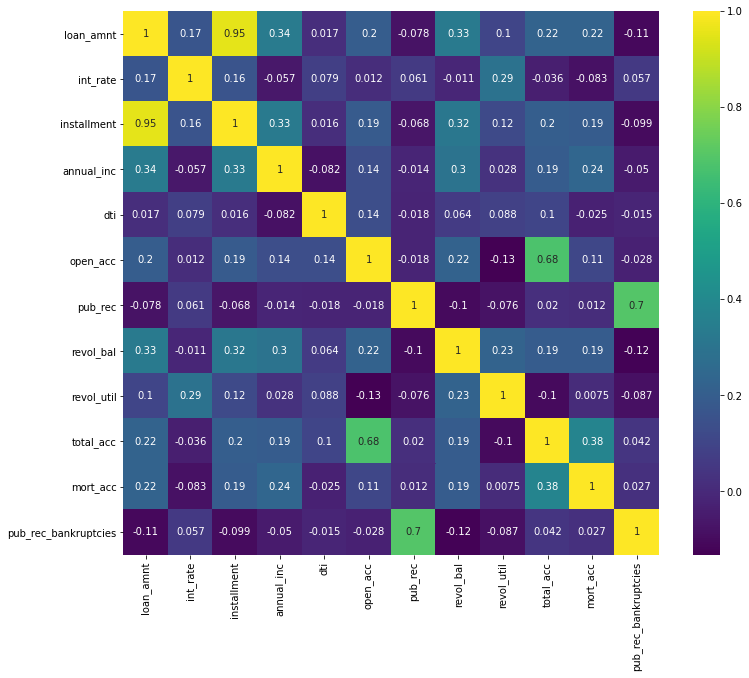

In [13]:
#let's plot a heatmap to get more insights on the correlation matrix.
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

We can see that loan amount and installment has a high correaltion. 

In [14]:
feat_info('loan_amnt') # About Loan amount

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [15]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


So the relationship b/w loan amount and installment will be based on certain calculations. Generally most of the banks have their own methods to calculate and provide the loans.

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

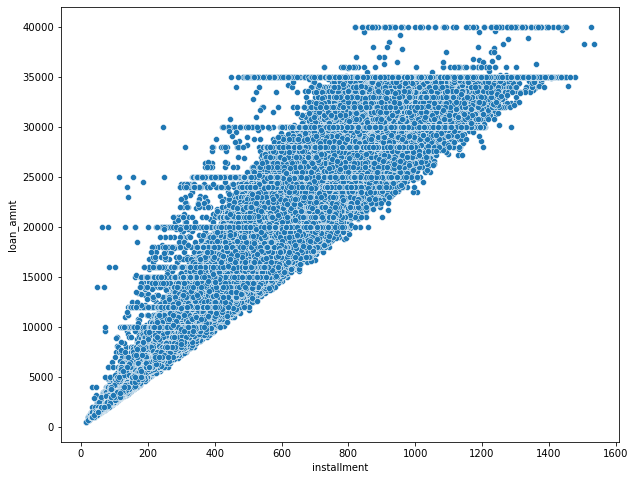

In [16]:
# Let's see the scatter plot between these two variables.
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'installment', y = 'loan_amnt', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

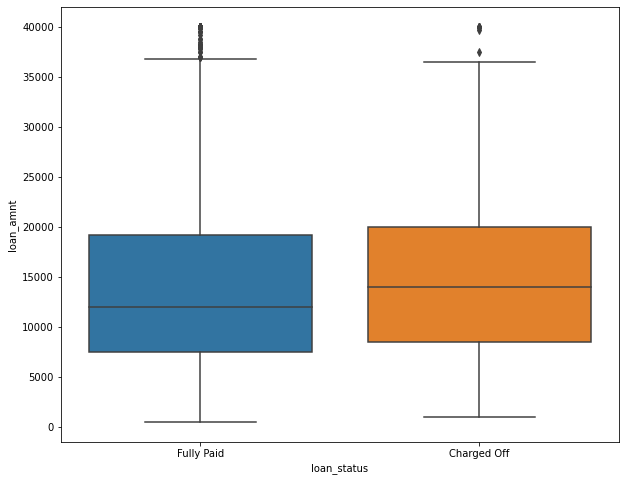

In [17]:
# Check the relationship between loan amount and loan status. Let's see we can find anything significant.
plt.figure(figsize=(10, 8))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

Since it's an unbalanced dataset we can't clearly point out the differences, but the Mean and 75th percentile amounts for 'Charged Off' loans are comparatively higher. So, higher loan amounts are Charged off more.

In [18]:
# A summary statistics based of loan status on loan amount can explain more clearly.
df.groupby('loan_status')['loan_amnt'].describe() # Quantative numbers of the box plot.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [19]:
# Certain grades and subgrades are assigned to borrowers. 
feat_info('grade')
df['grade'].unique()

LC assigned loan grade


array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [20]:
feat_info('sub_grade')
df['sub_grade'].unique()

LC assigned loan subgrade


array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

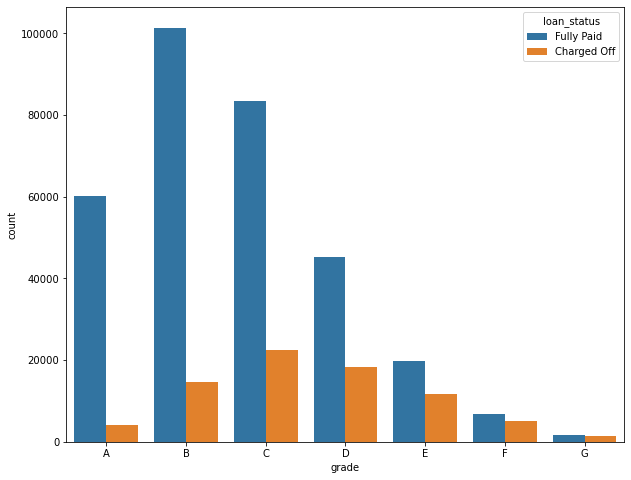

In [21]:
# Let's explore the loan status and loan grade relation.
plt.figure(figsize=(10,8))
grade_order = sorted(df['grade'].unique())
sns.countplot(x='grade', hue='loan_status', data=df, order= grade_order)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

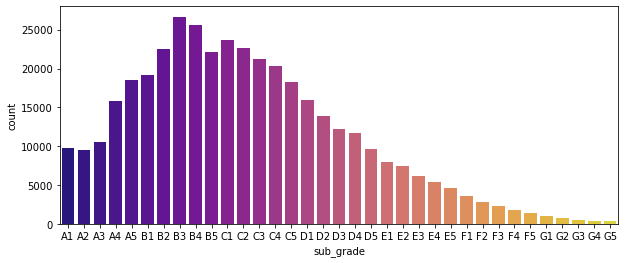

In [22]:
plt.figure(figsize=(10,4))
sub_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, palette='plasma',order=sub_order)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

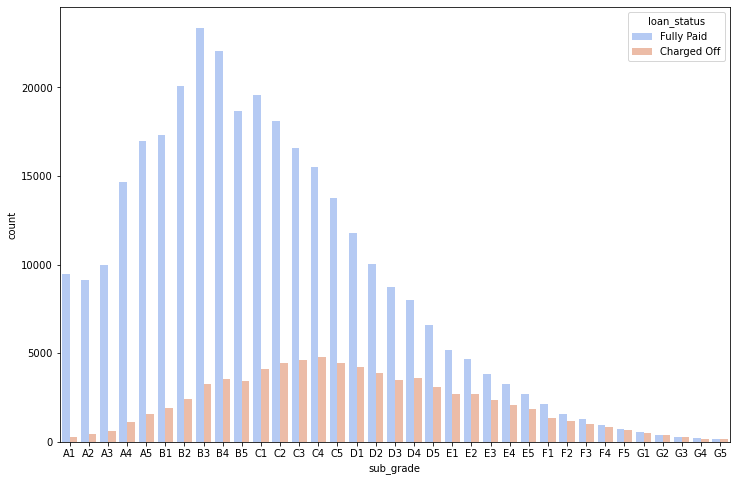

In [23]:
plt.figure(figsize=(12,8))
sub_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', hue = 'loan_status', data=df, palette='coolwarm',order=sub_order)

<AxesSubplot:xlabel='sub_grade', ylabel='loan_amnt'>

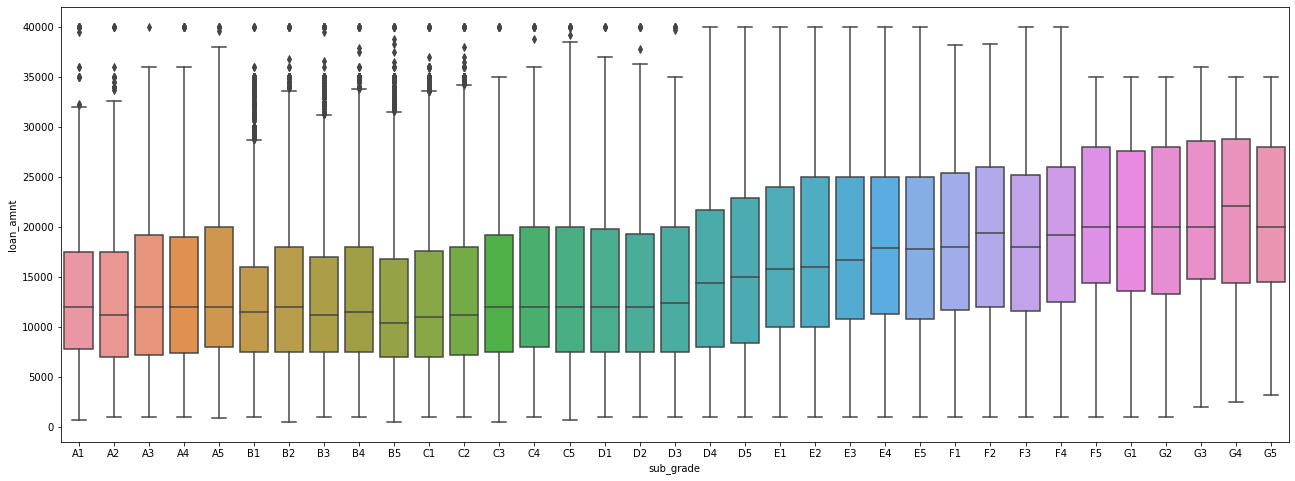

In [24]:
plt.figure(figsize=(22, 8))
sns.boxplot(x='sub_grade', y = 'loan_amnt', data=df, order = sub_order)

E, F and G are the high loan amount categories. So, lets explore their loan status.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

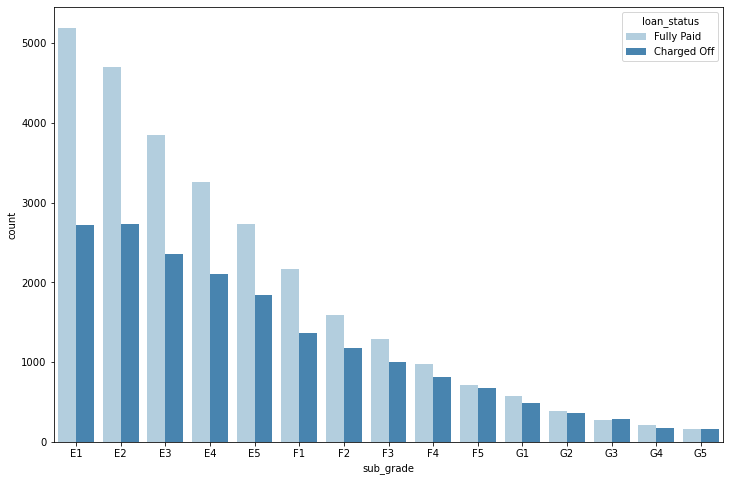

In [25]:
e_f_g = df[(df['grade']=='E') | (df['grade']== 'F') | (df['grade']=='G')]

plt.figure(figsize=(12,8))
sub_order = sorted(e_f_g['sub_grade'].unique())
sns.countplot(x='sub_grade', hue = 'loan_status', data=e_f_g, palette='Blues',order=sub_order)

So, it's clear that sub grades of 'G' are having relatively higher Charged off than any.

In [26]:
# Let's explore the correration of features with the target variable.
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [27]:
# There are two values either the loans are Fully paid or Charged off. So we can easily transform them to discrete values.
df['loan_repayment'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df['loan_repayment']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repayment, Length: 396030, dtype: int64

<AxesSubplot:>

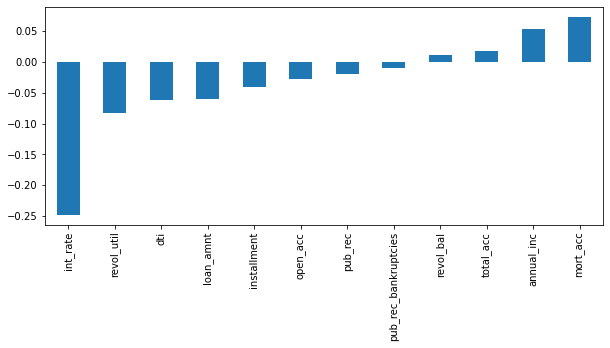

In [28]:
plt.figure(figsize=(10,4))
df.corr()['loan_repayment'][:-1].sort_values().plot(kind='bar')

## Data Preprocessing: Missing Data

In [29]:
# We can check what percentage of our data is missing
df.isnull().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
dti                         0
address                     0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
loan_amnt                   0
term                        0
purpose                     0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
loan_repayment              0
dtype: int64

In [30]:
len(df)

396030

In [31]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repayment          0.000000
dtype: float64

In [32]:
# Explore the discription about each feature with major amount of missing data.
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [33]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [34]:
df['emp_title'].nunique()

173105

In [35]:
df['emp_title'].value_counts()

Teacher                                    4389
Manager                                    4250
Registered Nurse                           1856
RN                                         1846
Supervisor                                 1830
                                           ... 
masciarelli wine co                           1
2nd Asst. Superintendent                      1
Appeals specialist                            1
Supervisor Associate Medical Specialist       1
Fixed ops manager                             1
Name: emp_title, Length: 173105, dtype: int64

It's having too many categories. So it's better to drop them. If we had much more domain knowledge, then we could have applied more advanced feature engineering to categorize them in various levels.

In [36]:
df = df.drop('emp_title', axis=1)

In [37]:
df['emp_length'].nunique()

11

In [38]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [39]:
sorted_emp_length = ['1 year',
 '< 1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years', '10+ years']
sorted_emp_length

['1 year',
 '< 1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

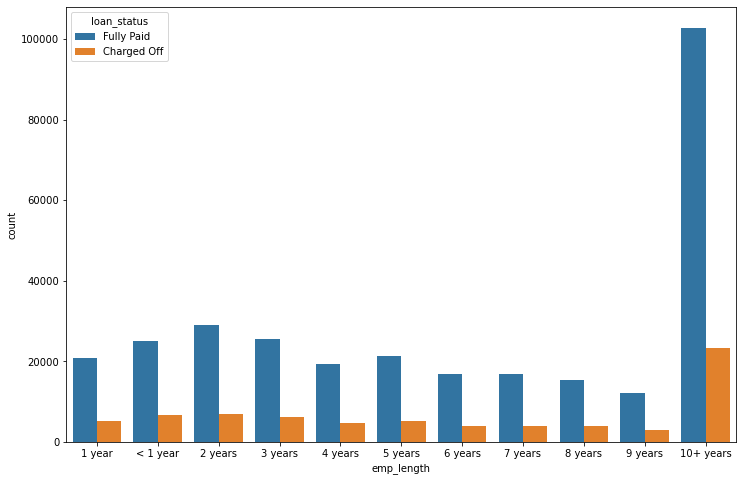

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x='emp_length', data=df, order=sorted_emp_length, hue='loan_status')

In [41]:
# Let's explore their ratio.
emp_cf = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status'] # Represents the Orange bars in the plot.
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status'] # Represents the Blue bars in the plot.

In [42]:
emp_length = emp_cf/(emp_fp+emp_cf)
emp_length

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

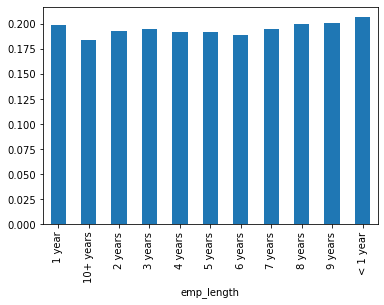

In [43]:
emp_length.plot(kind='bar')

So, the ratio is almost the same throughout the length. Only 10+ years has a slightly less ratio. So, it's better to drop this since therewon't be any great impact on our target variable.

In [44]:
df = df.drop('emp_length', axis=1)
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repayment              0
dtype: int64

We still have certain features with missing data.

In [45]:
feat_info('title')

The loan title provided by the borrower


In [46]:
df['title'].value_counts()

Debt consolidation             152472
Credit card refinancing         51487
Home improvement                15264
Other                           12930
Debt Consolidation              11608
                                ...  
Barn/Fence                          1
Getting it under control            1
DebtConsolRequest                   1
Barclay Consolidation               1
Reduce Credit Card Interest         1
Name: title, Length: 48817, dtype: int64

In [47]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


So, title is a subcategory of purpose. There won't be any use with this feature.

In [48]:
df=df.drop('title',axis=1)

In [49]:
# Let's understand more about mort_acc feature.
feat_info('mort_acc')

Number of mortgage accounts.


In [50]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

Most people have 0 mortgage accounts. This missing data is almost 10% of the data. So we need to know whether the feature is important or not.

<AxesSubplot:>

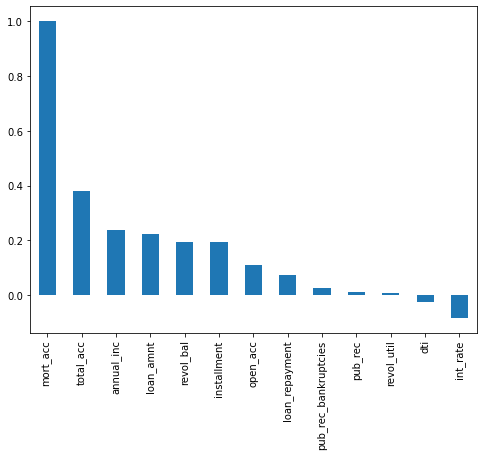

In [51]:
plt.figure(figsize=(8,6))
df.corr()['mort_acc'].sort_values(ascending=False).plot(kind='bar')

It looks like mortgage account is having a good correlation with total accounts, which is very common. So, it will be a useful feature in creating our model.

In [52]:
# Fill the missing data.
tot_acc_avg = df.groupby('total_acc').mean()['mort_acc']
tot_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Quick Note: total account values are not missing and mortgage account is having a good correlation with this feature. So, we used it to create a series that can be used for filling up the mssing data. 

These average values of mortgage account is used as lookup for missing data based on the total account category.

In [53]:
# Apply a function to fill in the missing data for mortgage account.
def fill_mort_acc(mort_acc, total_acc):
    if np.isnan(mort_acc):
        return tot_acc_avg[total_acc]
    else:
        return mort_acc

In [54]:
# A two column function.
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [55]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repayment            0
dtype: int64

So, we have successfully replaced the missing data. Now we can drop the remaining negligible percentage of missing data in the dataframe without dropping the entire feature.

In [56]:
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repayment          0
dtype: int64

## Data Preprocessing: Categorical Variables to dummy variables.

In [57]:
# List non-numeric or object columns.
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [58]:
# Managing the 'term' feature.
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [59]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [60]:
# Convert them into integers with values as the first two terms: 36 and 60.
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [61]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

Next features are grade and sub grade. Sub grade feature actually contains the grades, it's a sub category. So, we can drop grades features entirely.

In [62]:
df=df.drop('grade', axis=1)

In [63]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repayment'],
      dtype='object')

In [64]:
# Convert the sub grades to dummy variables and concatenate them.
dummy = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1), dummy],axis =1)

In [65]:
# Similarly for other categorical features too.
dummy = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1), dummy],axis =1)

In [66]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Here we can actually put the ANY and NONE categories to OTHER.

In [67]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [68]:
# Now add as dummy variables.
dummy = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1), dummy],axis =1)

In [69]:
# Address column.
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

We can extract the zipcodes and check whether we can replace them with dummy values.

In [70]:
df['zip'] = df['address'].apply(lambda address: address[-5:])
df['zip'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip, dtype: int64

In [71]:
dummy = pd.get_dummies(df['zip'], drop_first=True)
df = pd.concat([df.drop('zip', axis=1), dummy],axis =1)

In [72]:
df = df.drop('address', axis=1)

In [73]:
# issue_d column
feat_info('issue_d')

The month which the loan was funded


In a model we don't have the funding month, means we will not know whether or not a loan will be issued. It's considered as data leakage. So let's drop the issue date column.

In [74]:
df = df.drop('issue_d', axis=1)

In [75]:
# The last feature is earliest_cr_line.
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [76]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

It's a historical data. The year will be useful for model.

In [77]:
# let's extract the year and covert it into numerical value.
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda year: int(year[4:]))
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [78]:
df = df.drop('earliest_cr_line', axis=1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  object 
 6   dti                                  395219 non-null  float64
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

## Train_Test_Split

In [84]:
# First we need to remove the loan status column because we already made a dummy variable column loan repayment.
df =df.drop('loan_status', axis=1)

In [124]:
X = df.drop('loan_repayment', axis=1).values
y= df['loan_repayment'].values

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

## Normalize the data

In [126]:
# We will use the MinMaxScaler for Normalisation of data.
from sklearn.preprocessing import MinMaxScaler

In [127]:
scaler = MinMaxScaler()

In [128]:
X_train = scaler.fit_transform(X_train)

In [129]:
X_test = scaler.transform(X_test)

## Model Creation

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [131]:
model = Sequential()

model.add(Dense(79, activation = 'relu')) # First layer contains number of neurons as same number of features
model.add(Dropout(0.2))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy')

In [132]:
model.fit(x=X_train, y= y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/25
1081/1081 [==============================] - 2s 1ms/step - loss: 0.3092 - val_loss: 0.2652
Epoch 2/25
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2667 - val_loss: 0.2632
Epoch 3/25
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2632 - val_loss: 0.2623
Epoch 4/25
1081/1081 [==============================] - 2s 1ms/step - loss: 0.2619 - val_loss: 0.2619
Epoch 5/25
1081/1081 [==============================] - 2s 1ms/step - loss: 0.2608 - val_loss: 0.2622
Epoch 6/25
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2601 - val_loss: 0.2615
Epoch 7/25
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2598 - val_loss: 0.2621
Epoch 8/25
1081/1081 [==============================] - 2s 1ms/step - loss: 0.2594 - val_loss: 0.2620
Epoch 9/25
1081/1081 [==============================] - 2s 1ms/step - loss: 0.2588 - val_loss: 0.2616
Epoch 10/25
1081/1081 [==============================] - 2s 2ms/step - loss: 0.258

<AxesSubplot:>

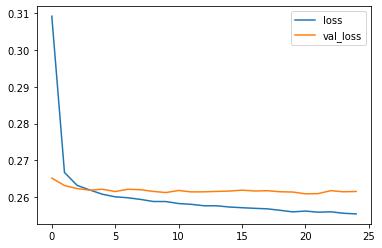

In [133]:
loss = pd.DataFrame(model.history.history)
loss.plot()

We can clearly see a case of overfitting here.

In [134]:
# Let's try with Early stopping Callback method.
from tensorflow.keras.callbacks import EarlyStopping

In [135]:
model = Sequential()

model.add(Dense(79, activation = 'relu')) # First layer contains number of neurons as same number of features
model.add(Dropout(0.3))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy')

e_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [136]:
model.fit(x=X_train, y= y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test), callbacks=[e_stop])

Epoch 1/50
1081/1081 [==============================] - 2s 2ms/step - loss: 0.3145 - val_loss: 0.2672
Epoch 2/50
1081/1081 [==============================] - 2s 1ms/step - loss: 0.2690 - val_loss: 0.2642
Epoch 3/50
1081/1081 [==============================] - 2s 1ms/step - loss: 0.2655 - val_loss: 0.2630
Epoch 4/50
1081/1081 [==============================] - 2s 2ms/step - loss: 0.2633 - val_loss: 0.2629
Epoch 5/50
1081/1081 [==============================] - 2s 2ms/step - loss: 0.2626 - val_loss: 0.2624
Epoch 6/50
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2616 - val_loss: 0.2620
Epoch 7/50
1081/1081 [==============================] - 2s 1ms/step - loss: 0.2613 - val_loss: 0.2621
Epoch 8/50
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2605 - val_loss: 0.2615
Epoch 9/50
1081/1081 [==============================] - 2s 1ms/step - loss: 0.2604 - val_loss: 0.2623
Epoch 10/50
1081/1081 [==============================] - 2s 1ms/step - loss: 0.260

<AxesSubplot:>

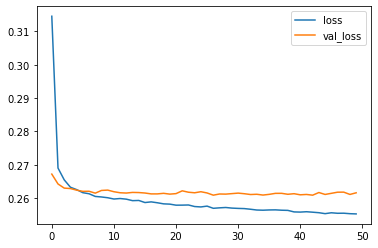

In [137]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [138]:
# Check the balance in data.
df['loan_repayment'].value_counts()

1    317696
0     77523
Name: loan_repayment, dtype: int64

In [139]:
# Ration of values.
317696/len(df)

0.8038479931379817

80% of the data is single value. It's unbalanced data.

## Model Evaluation

In [140]:
from sklearn.metrics import classification_report, confusion_matrix

In [141]:
# model prediction.
predictions = model.predict_classes(X_test)

In [142]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     23363
           1       0.88      1.00      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.93      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566



As there is an unbalance in the labels, the f1 score for 0 class with lower counts is low.

In [143]:
print(confusion_matrix(y_test, predictions))

[[10107 13256]
 [  137 95066]]


In [144]:
# Run Model on sample data.

import random
random.seed(101)
random_ind = random.randint(0,len(df)) # A random number is generated between 0 and length of the dataframe.
random_ind

304691

In [150]:
new_customer = df.drop('loan_repayment', axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [151]:
# Reshape and scale the data.

new_customer = new_customer.values.reshape(1,78)
new_customer = scaler.transform(new_customer)
new_customer

array([[0.61538462, 1.        , 0.50331126, 0.40822812, 0.00708257,
        0.0030113 , 0.2       , 0.        , 0.01593446, 0.42810458,
        0.29530201, 0.29530201, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.  

In [153]:
# Predict the class.
prediction = model.predict_classes(new_customer)
prediction

array([[1]])

In [154]:
# Verify the predicted class.
df['loan_repayment'].iloc[random_ind]

1

# Thank You